# Titanic EDA Lab

_Author: Schubert Hervey Laforest (BOS)_

---

<img src="https://republika.mk/wp-content/uploads/2017/01/titanik.jpg">

---

## Step 0: Understanding the data

*Table Key* 

**Survival**: Survival 	0 = No, 1 = Yes 

**Pclass**: Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
**Sex**: 	Sex 	
**Age**: 	Age in years 	
**SibSp**:  # of siblings / spouses aboard the Titanic 	
**Parch**: 	# of parents / children aboard the Titanic 	
**Ticket**: Ticket number 	
**Fare**: 	Passenger fare 	
**Cabin**: 	Cabin number 	
**Embarked**: 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

*Variable Notes*

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Step 1: Reading the data

In [246]:
# importing everything we need
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [247]:
# Opening and reading the Titanic data set 
csv_file = "./train.csv"
titanic = pd.read_csv(csv_file)

In [248]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [250]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [251]:
titanic.shape

(891, 12)

In [252]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [253]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Step 2: Cleaning the Data

In [254]:
# Finding the amount of nulls in our data 
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Text(0.5,1,'Missing Values per Column')

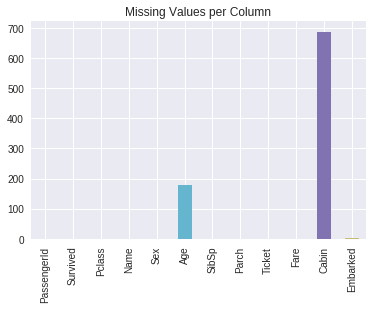

In [255]:
# Plotting the nulls in our data in a bar graph 
titanic.isnull().sum().plot(kind='bar').set_title('Missing Values per Column')

As we can see, the `Cabin` column is the one with the most amount of NaNs, totalling at 687.

In [256]:
# Deleting all the rows where embarked is empty 
titanic = titanic[-titanic['Embarked'].isnull()]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


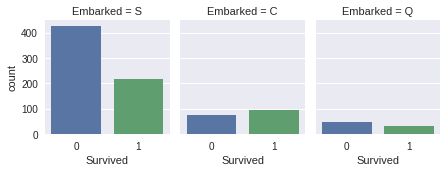

In [257]:
# Survival rate per Embarked location
sns.factorplot("Survived", col="Embarked", col_wrap=4,data=titanic[titanic.Embarked.notnull()],kind="count", size=2.5, aspect=.8);

In [258]:
# Filling empty cabins with shrug
titanic['Cabin'].fillna('¯\(ツ)/¯', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature Extraction

*Family Members*

There are two columns in the data set that allow us to determine how many family members are on the boat for a given person: `SibSp` (# of siblings / spouses aboard the Titanic) and `Parch` (# of parents / children aboard the Titanic). Let's create a new column called `FamilyCount` which will be the sum of the two aforementioned columns.  

In [259]:
# new column with the total count of associated family members 
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\(ツ)/¯,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\(ツ)/¯,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\(ツ)/¯,Q,0


*Are you a Reverend?*

In [260]:
# creates a column of everyone's Title
titanic['Title'] = titanic['Name'].str.split(r'\s*,\s*|\s*\.\s*').str[1]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,Mr


In [261]:
# creates a column that will indicate whether the person is a preacher or not 
rev_dict = {'Rev': 1}

titanic['IsReverend'] = titanic['Title'].map(rev_dict).fillna(int(0))
titanic['IsReverend'] = titanic['IsReverend'].map(lambda x: int(x))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,Mr,0


In [262]:
# One-hot encoding Embarked, Sex and Title categories 
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Sex', 'Title'])
#titanic.drop('IsReverend', axis=1) # no longer need since we have all Titles one-hot encoded
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0


In [263]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

## Step 4 & 5: Exploratory Analysis & Plotting

### General Stats

In [264]:
women_survived = len(titanic.query("Survived == 1 & Sex_male == 0"))
women_died = len(titanic.query("Survived == 0 & Sex_male == 0"))
men_survived = len(titanic.query("Survived == 1 & Sex_male == 1"))
men_died = len(titanic.query("Survived == 0 & Sex_male == 1"))

total_survived = women_survived + men_survived
total_died = men_died + women_died
total_embarked = total_died + total_survived

In [265]:
overall_survival_rate = (total_survived * 100)/total_embarked
print('The survival rate overall was {} %'.format(round(overall_survival_rate)))

men_survival_rate = (men_survived * 100)/total_embarked
print('Men faired the worst with a survival rate of {} %'.format(round(men_survival_rate)))

The survival rate overall was 38 %
Men faired the worst with a survival rate of 12 %


In [266]:
mask = (titanic['IsReverend'] == 1)# & (titanic['Survived'] == 0)
len(titanic[mask])

6

Out of the 6 reverends on board, none of them survived. 

In [267]:
shrug =  (titanic['Cabin'] == '¯\(ツ)/¯')
shrug_survival_rate = (len(titanic[shrug]) * 100)/total_embarked
print('The survival rate for cabins marked ¯\(ツ)/¯ was {} %'.format(round(shrug_survival_rate)))

The survival rate for cabins marked ¯\(ツ)/¯ was 77 %


In [268]:
no_age = (titanic['Age'].isnull() & titanic['Survived'] == 1).sum()
no_age_survival_rate = (no_age *100)/total_embarked
print('The survival rate for people where no age is specified was {} %'.format(round(no_age_survival_rate)))

The survival rate for people where no age is specified was 6.0 %


In [269]:
num_children_p1 = ((titanic['Age'] < 12) & (titanic['Pclass'] == 1)).sum()
num_children_p2 = ((titanic['Age'] < 12) & (titanic['Pclass'] == 2)).sum()
num_children_p3 = ((titanic['Age'] < 12) & (titanic['Pclass'] == 3)).sum()
num_children = (titanic['Age'] < 12).sum()

In [270]:
children_p1_survival_rate = (num_children_p1 * 100)/num_children
print('The survival rate for children in the P1 class was {} %'.format(round(children_p1_survival_rate)))

children_p2_survival_rate = (num_children_p2 * 100)/num_children
print('The survival rate for children in the P2 class was {} %'.format(round(children_p2_survival_rate)))

children_p3_survival_rate = (num_children_p3 * 100)/num_children
print('The survival rate for children in the P3 class was {} %'.format(round(children_p3_survival_rate)))

The survival rate for children in the P1 class was 6.0 %
The survival rate for children in the P2 class was 25.0 %
The survival rate for children in the P3 class was 69.0 %


In [271]:
max_fare = titanic['Fare'].max()
#titanic.loc[titanic['Fare'] == 512.3292]
print('The highest fare on the titanic was ${}'.format(round(max_fare)))

The highest fare on the titanic was $512.0


In [272]:
# titanic.loc[titanic['Fare'] == 512.3292]

The people who had the highest fare were Miss Anna Ward, Mr. Thomas Drake Martinez Cardeza and Mr. Gustave J Lesurer. 

### Breaking down the Survival Rate 

Let's get a general sense of the survival rate. Survival = 0 means they did not survive, Survival = 1 means they did.

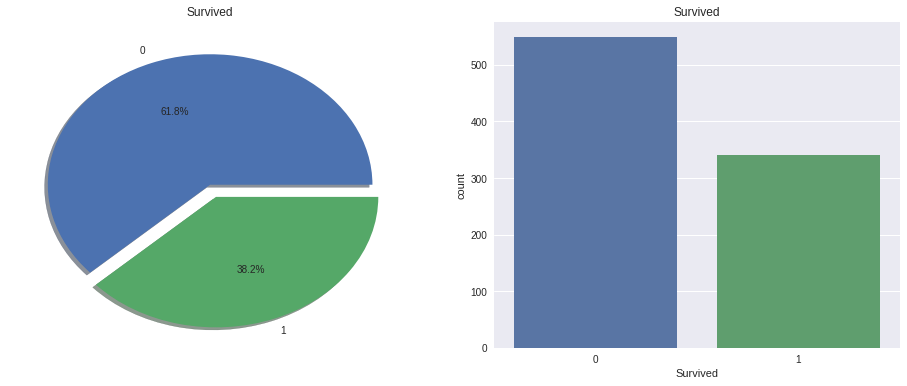

In [284]:
#Overall survival rate
f,ax=plt.subplots(1,2,figsize=(16,6))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

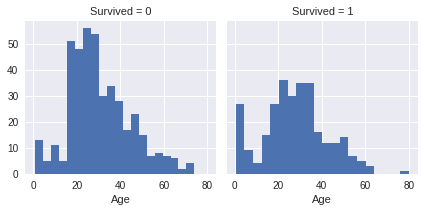

In [285]:
# Survival rte by age 
survival_age_sexe = sns.FacetGrid(titanic, col='Survived')
survival_age_sexe.map(plt.hist, 'Age', bins=20)
plt.subplots_adjust(top=0.9)
#survival_age_sexe.fig.suptitle('Survival Rate by Age');

**Survival Rate by Gender and Pclass**

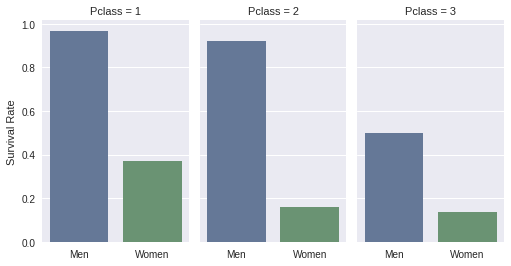

In [287]:
g = sns.factorplot(x="Sex_male", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
g.set_axis_labels("", "Survival Rate").set_xticklabels(["Men", "Women"]);

# Scrap

In [23]:
# Calculating the mean age (before learning mean in pandas auto filters out NaN)
age_is_null = pd.isnull(titanic['Age'])
good_ages = titanic['Age'][age_is_null == False] 
mean_age = sum(good_ages/len(good_ages))
mean_age

29.642092696629252

In [27]:
mean_age = titanic['Age'].mean()
mean_age

29.64209269662921

In [28]:
mean_fare = titanic['Fare'].mean()
mean_fare

32.09668087739029

In [22]:
titanic_corr = titanic.corr()

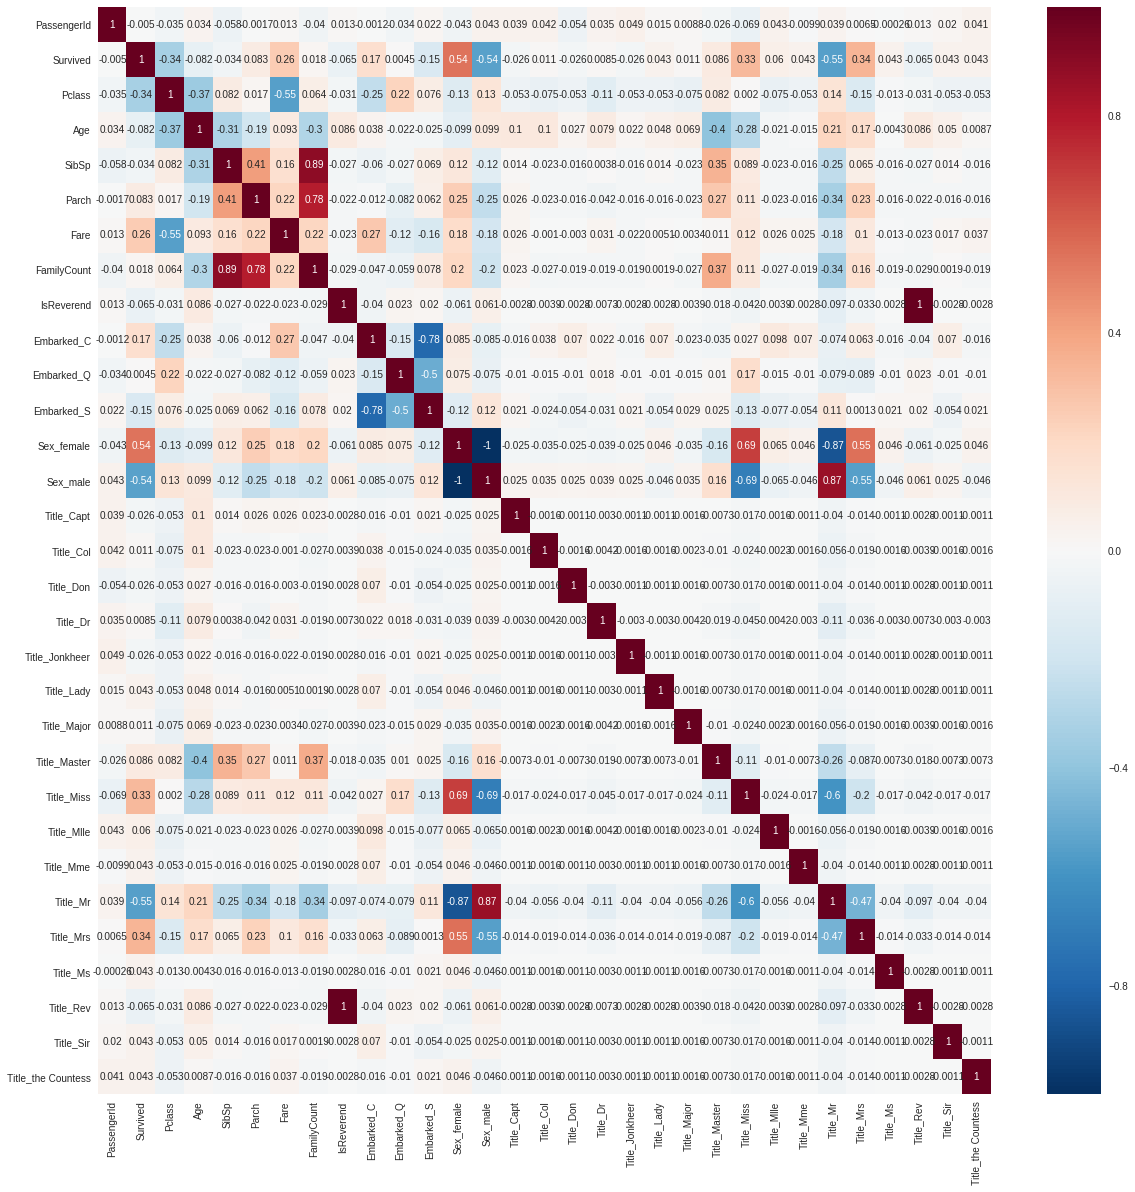

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(titanic.corr(), annot=True);

In [243]:
# What was the survival rate overall?

# Which gender fared the worst? What was their survival rate?

# What was the survival rate for each Pclass?

# Did any reverends survive? How many?

# What is the survival rate for cabins marked ¯\(ツ)/¯

# What is the survival rate for people whose Age is empty?

# What is the survival rate for each port of embarkation?

# What is the survival rate for children (under 12) in each Pclass?

# Did the captain of the ship survive? Is he on the list?

# Of all the people that died, who had the most expensive ticket? How much did it cost?

# Does having family on the boat help or hurt your chances of survival?